# Um a Zero:

"Uma das obras primas de Pixinguinha, foi gravado pela primeira vez pelo próprio autor ao saxofone em duo com Benedito Lacerda em disco Victor 80-0442-A, lançado em 1946. Editado pela Irmãos Vitale com coautoria de Benedito Lacerda por razões extra-musicais. Segundo Sérgio Cabral, em sua biografia Pixinguinha, vida e obra (Lumiar Editora, 1997), este choro teria sido composto em homenagem à vitória do Brasil sobre a seleção uruguaia no campeonato sul-americano de 1919, com gol do craque Friedenreich." [1]
<br><br>78 RPM, 1946. Victor Catálogo: 80-0442-a [2]
<br>Faixas: 
<br>1 - Um A Zero (Pixinguinha / Benedito Lacerda)
<br>2 - Sofres Porque Queres (Pixinguinha / Benedito Lacerda)
<br><br>



Referências:

[1] Página biográfica de Pixinguinha: https://pixinguinha.com.br/discografia/1-x-0-um-a-zero/

[2] Instituto Memória Musical Brasileira: https://immub.org/artista/pixinguinha
        
  


In [130]:
import os
from ipywidgets import Dropdown, HBox, VBox, Button
import ipywidgets as widgets
import IPython.display as ipd
from IPython.display import Markdown, clear_output
import librosa
from midi2audio import FluidSynth

#song name, index, song path, offset, duration
array_data=[ (0, 'Pixinguinha e Benedito Lacerda (1946)','data/03 Um a Zero.m4a', 0, 17),
             (1, 'Pixinguinha (1966)', 'data/01 Um a Zero.m4a', 19, 32), 
             (2, 'Trio Madeira Brasil (1998)', 'data/14 Um a Zero.m4a', 16 , 27),
             (3, 'Yo-Yo Ma (2003)', 'data/08 1 X 0 (Um a Zero).m4a', 0, 19),
             (4, 'Izabel Padovani(?)', 'data/1x0.wav',0,20),
             (5, 'NUMUT - Universidade Federal de Uberlândia (2007)', 'data/Um_a_zero.wav', 4.2, 20)
            ]

song_name_list = [row[1] for row in array_data]
index_list = [row[0] for row in array_data]
d_name = dict(zip(song_name_list, index_list)) 

wid1 = Dropdown(options=song_name_list)
wid2 = Dropdown(options=song_name_list)

print("Escolha duas interpretações e compile as células abaixo:")
HBox([wid1, wid2])

Escolha duas interpretações e compile as células abaixo:


HBox(children=(Dropdown(options=('Pixinguinha e Benedito Lacerda (1946)', 'Pixinguinha (1966)', 'Trio Madeira Brasil (1998)', 'Yo-Yo Ma (2003)', 'Izabel Padovani(?)', 'NUMUT - Universidade Federal de Uberlândia (2007)'), value='Pixinguinha e Benedito Lacerda (1946)'), Dropdown(options=('Pixinguinha e Benedito Lacerda (1946)', 'Pixinguinha (1966)', 'Trio Madeira Brasil (1998)', 'Yo-Yo Ma (2003)', 'Izabel Padovani(?)', 'NUMUT - Universidade Federal de Uberlândia (2007)'), value='Pixinguinha e Benedito Lacerda (1946)')))

In [131]:
   def audio_info(value, signal_name = "", offset = 0, duration = ""):
    x, Fs = librosa.load(value,  sr = 44100, offset = offset, duration = duration)
    print('The signal %s has %d samples, Fs = %d and a duration of %.2f seconds.' % (signal_name, len(x), Fs, len(x) / Fs))
    ipd.display(ipd.Audio(x, rate=Fs))
    return(x, Fs);

line1 = d_name[wid1.value]
line2 = d_name[wid2.value]
x1, Fs1 = audio_info(array_data[line1][2],
                     signal_name = array_data[line1][1],
                     offset = array_data[line1][3],
                     duration = array_data[line1][4])

x2, Fs2 = audio_info(array_data[line2][2],
                     signal_name = array_data[line2][1],
                     offset = array_data[line2][3],
                     duration = array_data[line2][4])




The signal Pixinguinha (1966) has 1411200 samples, Fs = 44100 and a duration of 32.00 seconds.


The signal Pixinguinha e Benedito Lacerda (1946) has 749700 samples, Fs = 44100 and a duration of 17.00 seconds.


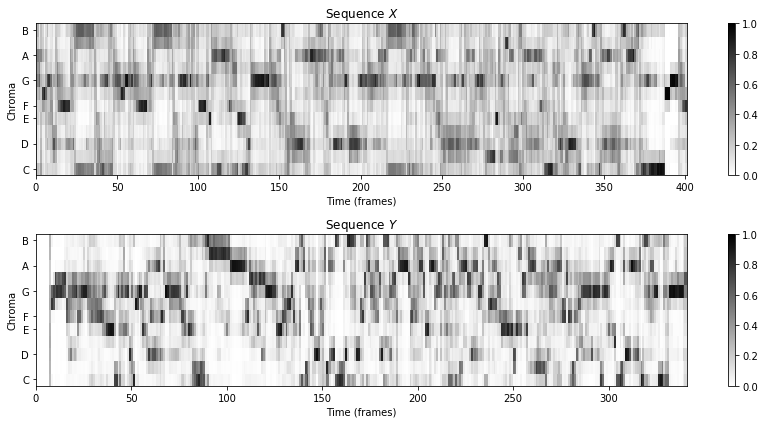

In [84]:
import matplotlib.pyplot as plt
import librosa, librosa.display
import numpy as np
%matplotlib inline

N = 4410
H = 2205
X = librosa.feature.chroma_stft(y=x1, sr=Fs1, tuning=0, norm=2, hop_length=H, n_fft=N)
Y = librosa.feature.chroma_stft(y=x2, sr=Fs2, tuning=0, norm=2, hop_length=H, n_fft=N)

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.title('Sequence $X$')
librosa.display.specshow(X, x_axis='frames', y_axis='chroma', cmap='gray_r', hop_length=H)
plt.xlabel('Time (frames)')
plt.ylabel('Chroma')
plt.colorbar()
plt.clim([0, 1])

plt.subplot(2, 1, 2)
plt.title('Sequence $Y$')
librosa.display.specshow(Y, x_axis='frames', y_axis='chroma', cmap='gray_r', hop_length=H)
plt.colorbar()
plt.clim([0, 1])
plt.xlabel('Time (frames)')
plt.ylabel('Chroma')
plt.tight_layout()


In [88]:
fs = Fs1
D, wp = librosa.sequence.dtw(X=X, Y=Y, metric='cosine')
wp_s = np.asarray(wp) * H / fs

librosa.display.specshow(D, x_axis='frames', y_axis='frames', hop_length=H)




IndexError: cannot do a non-empty take from an empty axes.

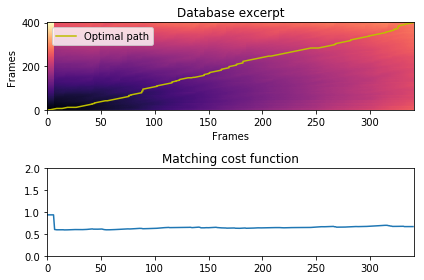

In [89]:
import numpy as np
import matplotlib.pyplot as plt

D, wp = librosa.sequence.dtw(X, Y)
plt.subplot(2, 1, 1)
librosa.display.specshow(D, x_axis='frames', y_axis='frames')
plt.title('Database excerpt')
plt.plot(wp[:, 1], wp[:, 0], label='Optimal path', color='y')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(D[-1, :] / wp.shape[0])
plt.xlim([0, Y.shape[1]])
plt.ylim([0, 2])
plt.title('Matching cost function')
plt.tight_layout()
plt.show()